## TENTANG DATA

Dataset ini memberikan gambaran yang komprehensif tentang harga Airbnb di beberapa kota Eropa yang paling populer. Setiap daftar dinilai untuk berbagai atribut seperti jenis kamar, peringkat kebersihan dan kepuasan, kamar tidur, jarak dari pusat kota, dan banyak lagi untuk menangkap pemahaman mendalam tentang harga Airbnb pada hari kerja dan akhir pekan. Dengan menggunakan metode ekonometrik spasial, kami menganalisis dan mengidentifikasi faktor-faktor yang menentukan harga Airbnb di kota-kota ini. Dataset kami mencakup informasi seperti realSum (harga total daftar), room_type (private/shared/entire home/apt), host_is_superhost (nilai boolean yang menunjukkan apakah host adalah superhost atau tidak), multi (indikator apakah daftar adalah untuk beberapa kamar atau bukan), biz (indikasi bisnis), guest_satisfaction_overall (peringkat keseluruhan dari tamu berkemah semua daftar yang ditawarkan oleh host ), kamar tidur, dist (jarak dari pusat kota), koordinat lng & lat untuk identifikasi lokasi, dll. 

Deskripsi kolom dataset:

| Column Name | Description | Data Type |
|-------------|-------------|-----------|
| realSum | The total price of the Airbnb listing | (Numeric) |
| room_type | The type of room being offered (e.g. private, shared, etc.) | (Categorical) |
| room_shared | Whether the room is shared or not | (Boolean) |
| room_private | Whether the room is private or not | (Boolean) |
| person_capacity | The maximum number of people that can stay in the room | (Numeric) |
| host_is_superhost	| Whether the host is a superhost or not | (Boolean) |
| multi | Whether the listing is for multiple rooms or not | (Boolean) |
| biz | Whether the listing is for business purposes or not | (Boolean) |
| cleanliness_rating | The cleanliness rating of the listing | (Numeric) |
| guest_satisfaction_overall | The overall guest satisfaction rating of the listing | (Numeric) |
| bedrooms | The number of bedrooms in the listing | (Numeric) |
| dist | The distance from the city centre | (Numeric) |
| metro_dist | The distance from the nearest metro station | (Numeric) |
| lng | The longitude of the listing | (Numeric) |
| lat | The latitude of the listing | (Numeric) |

## GOAL

Tujuan dari proyek ini adalah untuk mengaplikasikan Linear Regresi dalam memprediksi harga Airbnb di kota London

### 1. Importing Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse


import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv("london_weekends.csv")

### 2. Exploratory Data Analysis (EDA)

In [ ]:
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,121.122322,Private room,False,True,2.0,False,0,0,6.0,69.0,1,5.734117,0.437094,222.882243,15.493414,470.088502,8.413765,-0.04975,51.52570
1,1,195.912416,Private room,False,True,2.0,False,1,0,10.0,96.0,1,4.788905,1.464050,235.385841,16.362588,530.133525,9.488466,-0.08475,51.54210
2,2,193.325337,Private room,False,True,3.0,False,1,0,10.0,95.0,1,4.596677,0.450306,268.913812,18.693247,548.987610,9.825922,-0.14585,51.54802
3,3,180.389943,Private room,False,True,2.0,False,1,0,9.0,87.0,1,2.054769,0.132670,472.381314,32.837067,1021.271062,18.278973,-0.10611,51.52108
4,4,405.700981,Entire home/apt,False,False,3.0,False,0,1,7.0,65.0,0,4.491277,0.354108,318.491470,22.139584,692.775411,12.399473,-0.18797,51.49399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5374,5374,1035.066676,Private room,False,True,2.0,False,0,1,10.0,100.0,0,5.155373,0.883829,271.191201,18.851558,528.042180,9.451035,-0.05357,51.51255
5375,5375,181.095510,Private room,False,True,2.0,False,1,0,10.0,100.0,1,5.072177,0.344055,268.165870,18.641255,554.906232,9.931855,-0.05620,51.51823
5376,5376,420.517886,Entire home/apt,False,False,2.0,False,0,0,10.0,98.0,1,6.709982,0.926188,181.892001,12.644022,395.397885,7.076933,-0.22172,51.52180
5377,5377,217.314612,Private room,False,True,2.0,False,0,0,10.0,94.0,1,6.736940,0.353634,184.278328,12.809905,471.029678,8.430610,-0.22286,51.49715


In [ ]:
df.dtypes

Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

In [3]:
df= df.drop(['Unnamed: 0'], axis= 1) 
df

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,121.122322,Private room,False,True,2.0,False,0,0,6.0,69.0,1,5.734117,0.437094,222.882243,15.493414,470.088502,8.413765,-0.04975,51.52570
1,195.912416,Private room,False,True,2.0,False,1,0,10.0,96.0,1,4.788905,1.464050,235.385841,16.362588,530.133525,9.488466,-0.08475,51.54210
2,193.325337,Private room,False,True,3.0,False,1,0,10.0,95.0,1,4.596677,0.450306,268.913812,18.693247,548.987610,9.825922,-0.14585,51.54802
3,180.389943,Private room,False,True,2.0,False,1,0,9.0,87.0,1,2.054769,0.132670,472.381314,32.837067,1021.271062,18.278973,-0.10611,51.52108
4,405.700981,Entire home/apt,False,False,3.0,False,0,1,7.0,65.0,0,4.491277,0.354108,318.491470,22.139584,692.775411,12.399473,-0.18797,51.49399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5374,1035.066676,Private room,False,True,2.0,False,0,1,10.0,100.0,0,5.155373,0.883829,271.191201,18.851558,528.042180,9.451035,-0.05357,51.51255
5375,181.095510,Private room,False,True,2.0,False,1,0,10.0,100.0,1,5.072177,0.344055,268.165870,18.641255,554.906232,9.931855,-0.05620,51.51823
5376,420.517886,Entire home/apt,False,False,2.0,False,0,0,10.0,98.0,1,6.709982,0.926188,181.892001,12.644022,395.397885,7.076933,-0.22172,51.52180
5377,217.314612,Private room,False,True,2.0,False,0,0,10.0,94.0,1,6.736940,0.353634,184.278328,12.809905,471.029678,8.430610,-0.22286,51.49715


In [ ]:
print(df.columns)

Index(['realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')


In [ ]:
angka= df.drop(['room_type', 'room_shared', 'room_private','host_is_superhost','attr_index','attr_index_norm','rest_index','rest_index_norm','biz','multi'], axis= 1)

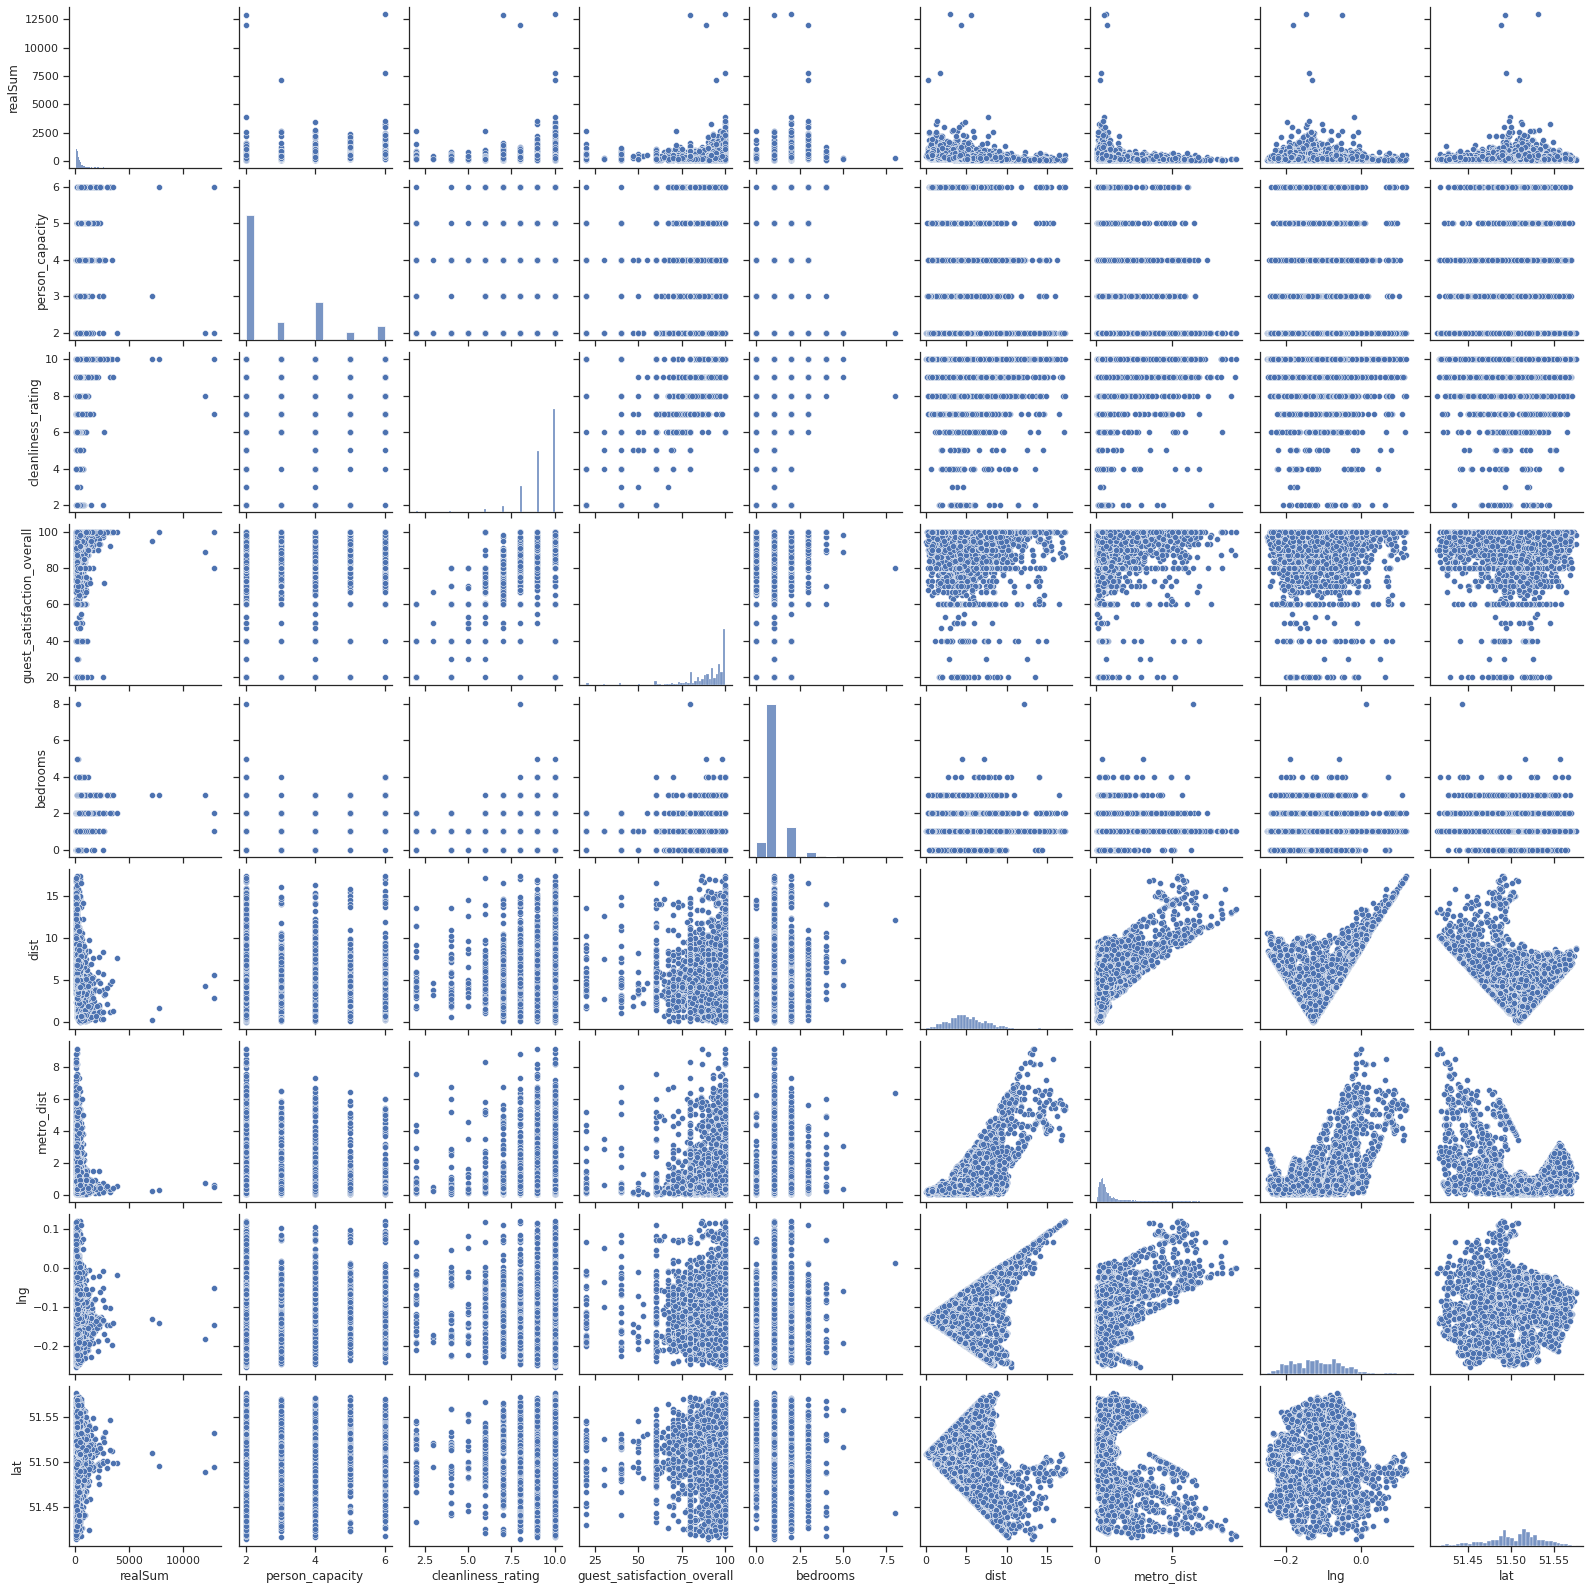

In [ ]:
sns.set(style="ticks", color_codes=True)     
g = sns.pairplot(angka)
plt.show()

- Tidak terdapat variabel independen yang memmilik korelasi kuat dengan variabel dependen `realSum`

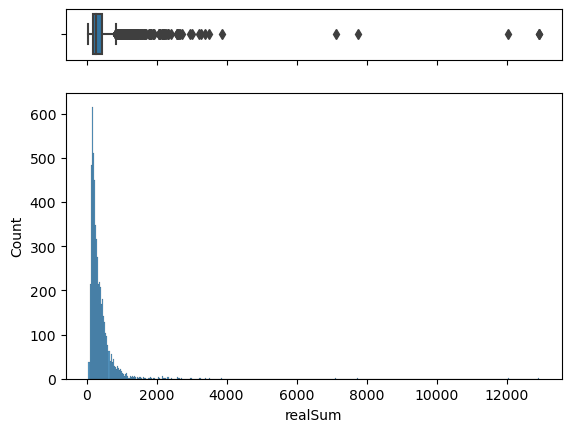

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})    
# assigning a graph to each ax
sns.boxplot(df['realSum'], ax=ax_box)
sns.histplot(data=df, x='realSum', ax=ax_hist)
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

- realSum tersebar dari diatas 0 sampai diatas 12000
- Persebaran normal realSum pada kisaran 0 sampai  1000 keatas
- Terdapat outliers yang sangat jauh hingga diatas 12000

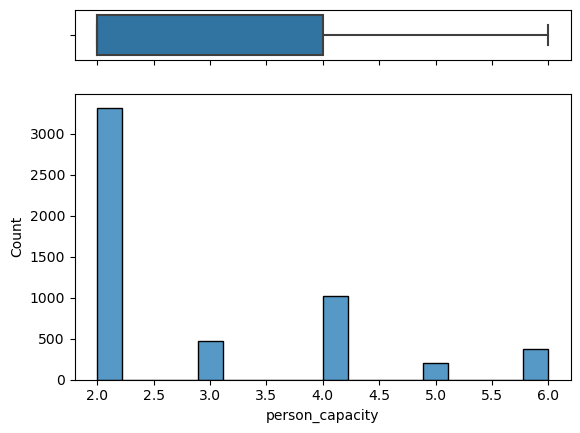

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})    
# assigning a graph to each ax
sns.boxplot(df['person_capacity'], ax=ax_box)
sns.histplot(data=df, x='person_capacity', ax=ax_hist)
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

- Kapasitas orang didominasi pada angka 2 hingga 4 
- Data tidak memiliki outliers

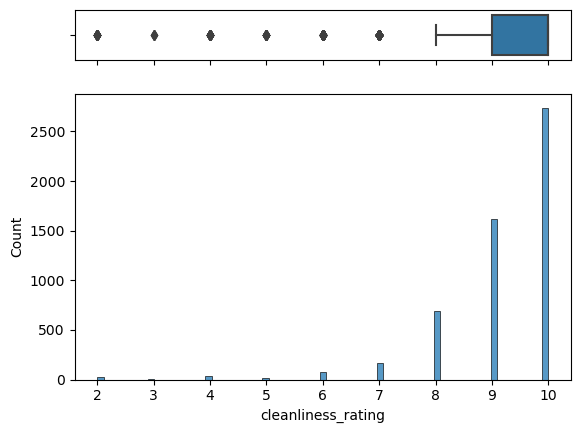

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})    
# assigning a graph to each ax
sns.boxplot(df['cleanliness_rating'], ax=ax_box)
sns.histplot(data=df, x='cleanliness_rating', ax=ax_hist)
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

- Kapasitas orang didominasi pada angka 8 hingga 10 
- Terdapat outliers pada  `cleanliness_rating` 2 sampai 7

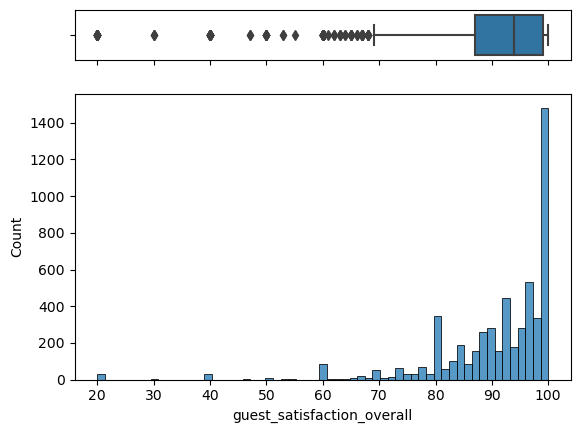

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})    
# assigning a graph to each ax
sns.boxplot(df['guest_satisfaction_overall'], ax=ax_box)
sns.histplot(data=df, x='guest_satisfaction_overall', ax=ax_hist)
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

- Kapasitas orang didominasi pada angka 70 keatas hingga 100 
- Terdapat outliers pada  range 20 sampai 69

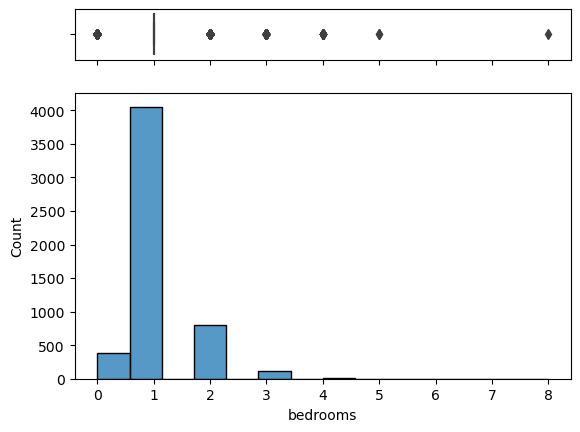

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})    
# assigning a graph to each ax
sns.boxplot(df['bedrooms'], ax=ax_box)
sns.histplot(data=df, x='bedrooms', ax=ax_hist)
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

- Kapasitas bedrooms pada angka 1  sedangkan sisanya outliers

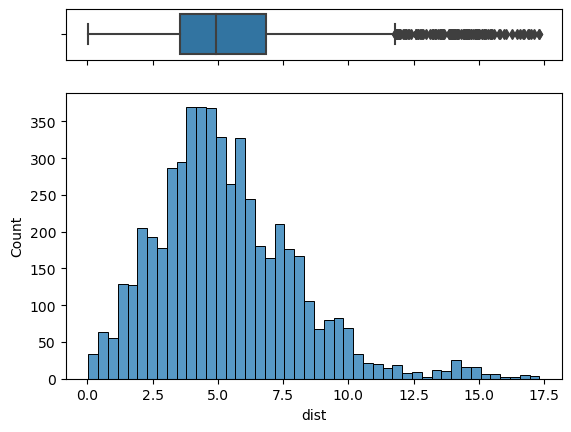

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})    
# assigning a graph to each ax
sns.boxplot(df['dist'], ax=ax_box)
sns.histplot(data=df, x='dist', ax=ax_hist)
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

- Distance tersebar dari range 0 - 17.5
- Distance didominasi pada kisaran 2.5 hingga 7
- Terdapat outliers pada kisaran 12.5 keatas

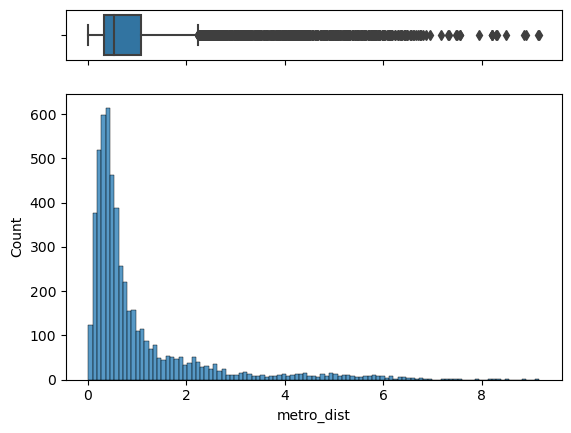

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})    
# assigning a graph to each ax
sns.boxplot(df['metro_dist'], ax=ax_box)
sns.histplot(data=df, x='metro_dist', ax=ax_hist)
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show() 

- metro_dist tersebar dari range 0 - 9 keatas
- metro_dist didominasi pada kisaran 0 hingga 71
- Terdapat outliers pada kisaran 2 keatas

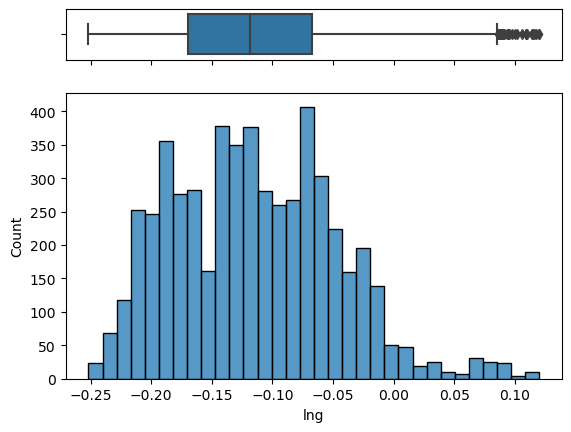

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})    
# assigning a graph to each ax
sns.boxplot(df['lng'], ax=ax_box)
sns.histplot(data=df, x='lng', ax=ax_hist)
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

- Data tersebar dari -0.25 hingga diatas 0.1
- Data didominasi pada angka diatas -0.20 hingga -0.8
- Outliers terdapat pada angka 0.08 keatas

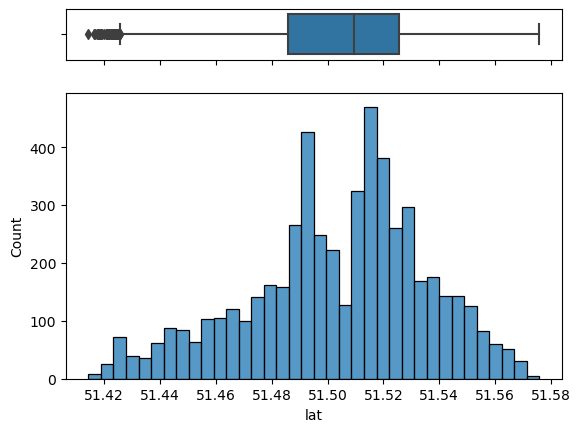

In [189]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})    
# assigning a graph to each ax
sns.boxplot(df['lat'], ax=ax_box)
sns.histplot(data=df, x='lat', ax=ax_hist)
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

- Data tersebar dari 51.42 hingga diatas 51.58
- Data didominasi pada angka diatas 51.48 hingga 51.52
- Outliers terdapat pada angka 51.44 kebawah

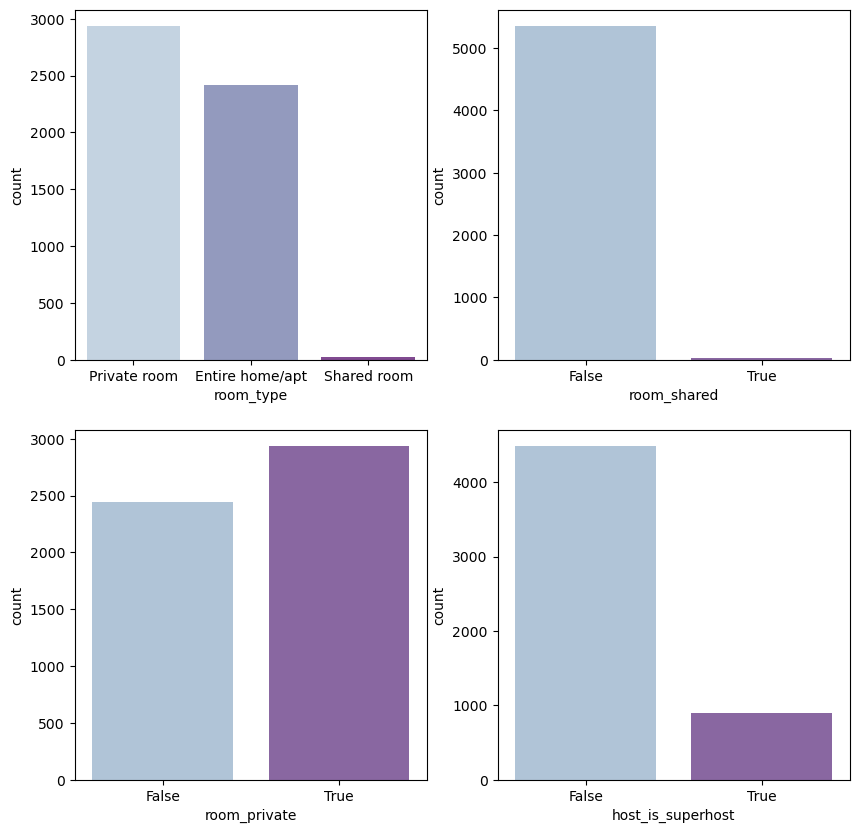

In [195]:
cat_features = df[[ 'room_type','room_shared','room_private','host_is_superhost']]
import seaborn as sns
fig , ax = plt.subplots(2,2,figsize = (10,10))     # set up 2 x 2 frame count plot with figsize 10 x 10
for i , subplots in zip (cat_features, ax.flatten()):  
  sns.countplot(cat_features[i], ax = subplots, palette = 'BuPu')
plt.show()

- Pada room_type, listing paling banyak memiiki room_type Private Room, dan sangat sedikit berupa Shared Room
- Pemilik Listing didominasi oleh mereka yang bukan Superhost

In [ ]:
a=df[df['room_shared']==False]
b=df[df['room_shared']==True]

len(a)

5352

<AxesSubplot:xlabel='host_is_superhost', ylabel='realSum'>

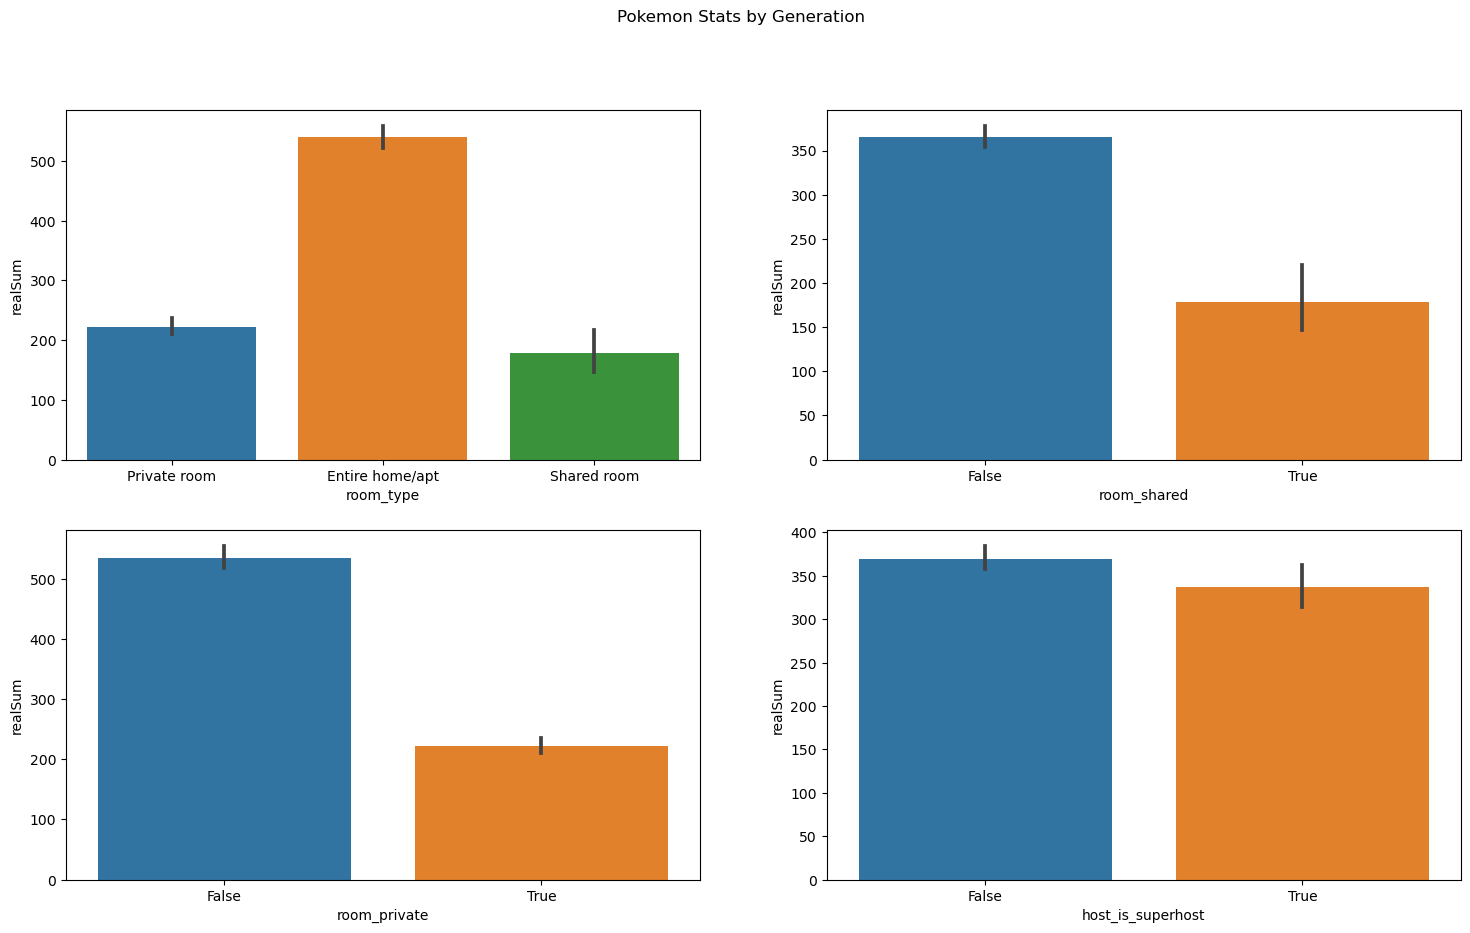

In [196]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Pokemon Stats by Generation')

sns.barplot(ax=axes[0, 0], data=df, x='room_type', y='realSum')
sns.barplot(ax=axes[0, 1], data=df, x='room_shared', y='realSum')
sns.barplot(ax=axes[1, 0], data=df, x='room_private', y='realSum')
sns.barplot(ax=axes[1, 1], data=df, x='host_is_superhost', y='realSum')

- Walaupun jumlah Listing Private Room paling banyak namun dari segi rata-rata harga room type Entire Home paling tinggi.
- Harga Private Room dan Shared Room tidak berbeda jauh secara rata-rata.
- Walaupun sebagian besar pemilik listing bukan superhost namun harga listing antara superhost dan tidak itu lebih tinggi yang bukan superhost dan keduanya tidak jauh berbeda dari segi harga.

<AxesSubplot:xlabel='host_is_superhost', ylabel='realSum'>

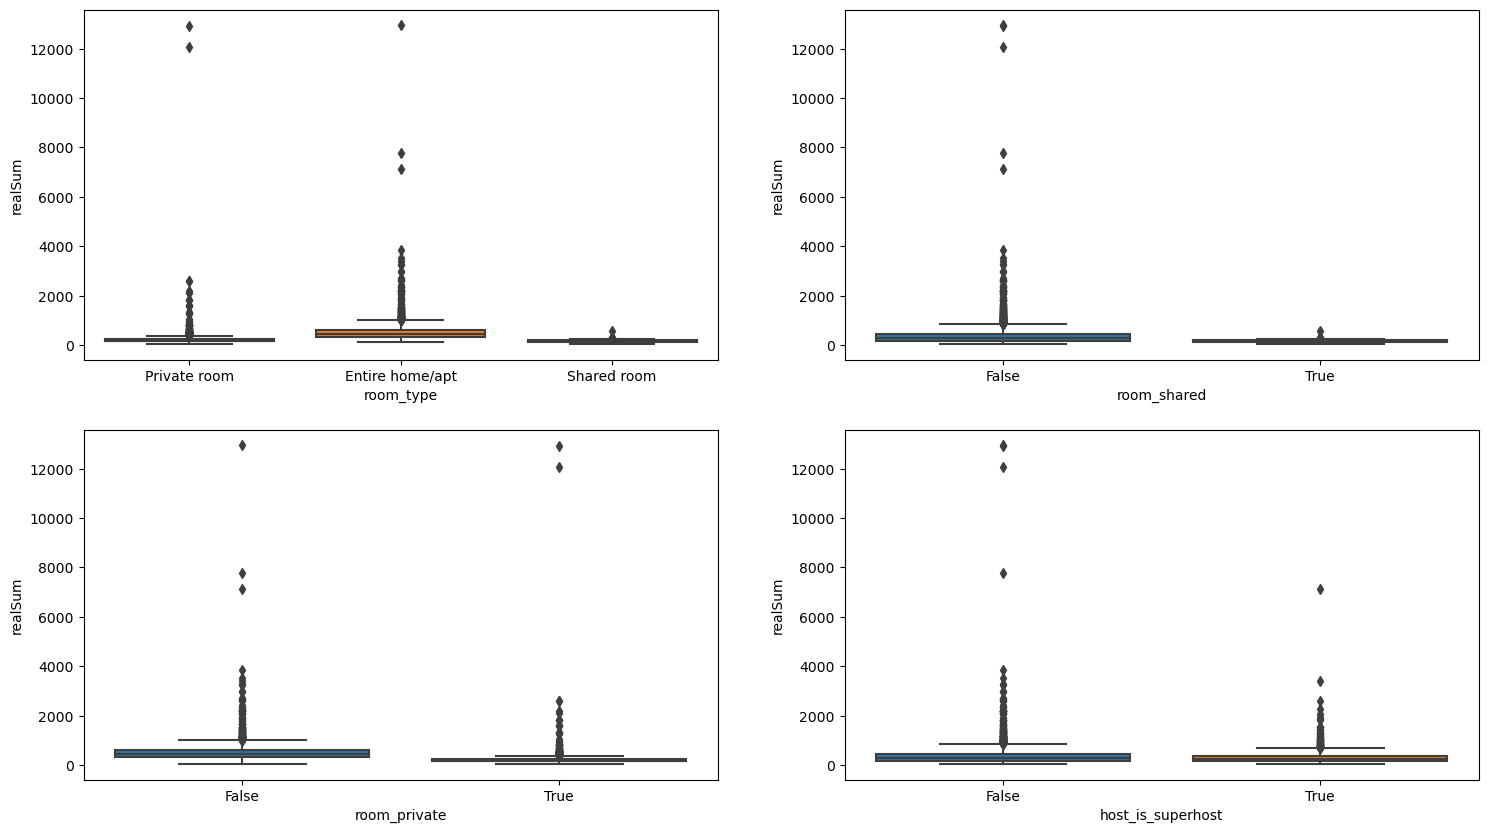

In [197]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

sns.boxplot(ax=axes[0, 0], data=df, x='room_type', y='realSum')
sns.boxplot(ax=axes[0, 1], data=df, x='room_shared', y='realSum')
sns.boxplot(ax=axes[1, 0], data=df, x='room_private', y='realSum')
sns.boxplot(ax=axes[1, 1], data=df, x='host_is_superhost', y='realSum')

### 3. Data Pre-Processing

In [198]:
df

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,121.122322,Private room,False,True,2.0,False,0,0,6.0,69.0,1,5.734117,0.437094,222.882243,15.493414,470.088502,8.413765,-0.04975,51.52570
1,195.912416,Private room,False,True,2.0,False,1,0,10.0,96.0,1,4.788905,1.464050,235.385841,16.362588,530.133525,9.488466,-0.08475,51.54210
2,193.325337,Private room,False,True,3.0,False,1,0,10.0,95.0,1,4.596677,0.450306,268.913812,18.693247,548.987610,9.825922,-0.14585,51.54802
3,180.389943,Private room,False,True,2.0,False,1,0,9.0,87.0,1,2.054769,0.132670,472.381314,32.837067,1021.271062,18.278973,-0.10611,51.52108
4,405.700981,Entire home/apt,False,False,3.0,False,0,1,7.0,65.0,0,4.491277,0.354108,318.491470,22.139584,692.775411,12.399473,-0.18797,51.49399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5374,1035.066676,Private room,False,True,2.0,False,0,1,10.0,100.0,0,5.155373,0.883829,271.191201,18.851558,528.042180,9.451035,-0.05357,51.51255
5375,181.095510,Private room,False,True,2.0,False,1,0,10.0,100.0,1,5.072177,0.344055,268.165870,18.641255,554.906232,9.931855,-0.05620,51.51823
5376,420.517886,Entire home/apt,False,False,2.0,False,0,0,10.0,98.0,1,6.709982,0.926188,181.892001,12.644022,395.397885,7.076933,-0.22172,51.52180
5377,217.314612,Private room,False,True,2.0,False,0,0,10.0,94.0,1,6.736940,0.353634,184.278328,12.809905,471.029678,8.430610,-0.22286,51.49715


In [4]:
df.replace({False: 0, True: 1},inplace=True)
df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,121.122322,Private room,0,1,2.0,0,0,0,6.0,69.0,1,5.734117,0.437094,222.882243,15.493414,470.088502,8.413765,-0.04975,51.52570
1,195.912416,Private room,0,1,2.0,0,1,0,10.0,96.0,1,4.788905,1.464050,235.385841,16.362588,530.133525,9.488466,-0.08475,51.54210
2,193.325337,Private room,0,1,3.0,0,1,0,10.0,95.0,1,4.596677,0.450306,268.913812,18.693247,548.987610,9.825922,-0.14585,51.54802
3,180.389943,Private room,0,1,2.0,0,1,0,9.0,87.0,1,2.054769,0.132670,472.381314,32.837067,1021.271062,18.278973,-0.10611,51.52108
4,405.700981,Entire home/apt,0,0,3.0,0,0,1,7.0,65.0,0,4.491277,0.354108,318.491470,22.139584,692.775411,12.399473,-0.18797,51.49399


In [ ]:
print(df.columns) 

Index(['realSum', 'room_shared', 'room_private', 'person_capacity',
       'host_is_superhost', 'multi', 'biz', 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')


In [5]:
df = pd.get_dummies(df, columns=['room_type','room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz'])
df.head() 

,realSum,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,...,room_shared_0,room_shared_1,room_private_0,room_private_1,host_is_superhost_0,host_is_superhost_1,multi_0,multi_1,biz_0,biz_1
0,121.122322,2.0,6.0,69.0,1,5.734117,0.437094,222.882243,15.493414,470.088502,...,1,0,0,1,1,0,1,0,1,0
1,195.912416,2.0,10.0,96.0,1,4.788905,1.464050,235.385841,16.362588,530.133525,...,1,0,0,1,1,0,0,1,1,0
2,193.325337,3.0,10.0,95.0,1,4.596677,0.450306,268.913812,18.693247,548.987610,...,1,0,0,1,1,0,0,1,1,0
3,180.389943,2.0,9.0,87.0,1,2.054769,0.132670,472.381314,32.837067,1021.271062,...,1,0,0,1,1,0,0,1,1,0
4,405.700981,3.0,7.0,65.0,0,4.491277,0.354108,318.491470,22.139584,692.775411,...,1,0,1,0,1,0,1,0,0,1


In [6]:
df= df.drop(['attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm'], axis= 1)
df

,realSum,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat,room_type_Entire home/apt,...,room_shared_0,room_shared_1,room_private_0,room_private_1,host_is_superhost_0,host_is_superhost_1,multi_0,multi_1,biz_0,biz_1
0,121.122322,2.0,6.0,69.0,1,5.734117,0.437094,-0.04975,51.52570,0,...,1,0,0,1,1,0,1,0,1,0
1,195.912416,2.0,10.0,96.0,1,4.788905,1.464050,-0.08475,51.54210,0,...,1,0,0,1,1,0,0,1,1,0
2,193.325337,3.0,10.0,95.0,1,4.596677,0.450306,-0.14585,51.54802,0,...,1,0,0,1,1,0,0,1,1,0
3,180.389943,2.0,9.0,87.0,1,2.054769,0.132670,-0.10611,51.52108,0,...,1,0,0,1,1,0,0,1,1,0
4,405.700981,3.0,7.0,65.0,0,4.491277,0.354108,-0.18797,51.49399,1,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5374,1035.066676,2.0,10.0,100.0,0,5.155373,0.883829,-0.05357,51.51255,0,...,1,0,0,1,1,0,1,0,0,1
5375,181.095510,2.0,10.0,100.0,1,5.072177,0.344055,-0.05620,51.51823,0,...,1,0,0,1,1,0,0,1,1,0
5376,420.517886,2.0,10.0,98.0,1,6.709982,0.926188,-0.22172,51.52180,1,...,1,0,1,0,1,0,1,0,1,0
5377,217.314612,2.0,10.0,94.0,1,6.736940,0.353634,-0.22286,51.49715,0,...,1,0,0,1,1,0,1,0,1,0


In [7]:
convert_dict = {'person_capacity': int
                }
df = df.astype(convert_dict)
df.dtypes

realSum                       float64
person_capacity                 int32
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
lng                           float64
lat                           float64
room_type_Entire home/apt       uint8
room_type_Private room          uint8
room_type_Shared room           uint8
room_shared_0                   uint8
room_shared_1                   uint8
room_private_0                  uint8
room_private_1                  uint8
host_is_superhost_0             uint8
host_is_superhost_1             uint8
multi_0                         uint8
multi_1                         uint8
biz_0                           uint8
biz_1                           uint8
dtype: object

In [8]:
df['logarithm_base2'] = np.log2(df['realSum'])
df

,realSum,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat,room_type_Entire home/apt,...,room_shared_1,room_private_0,room_private_1,host_is_superhost_0,host_is_superhost_1,multi_0,multi_1,biz_0,biz_1,logarithm_base2
0,121.122322,2,6.0,69.0,1,5.734117,0.437094,-0.04975,51.52570,0,...,0,0,1,1,0,1,0,1,0,6.920321
1,195.912416,2,10.0,96.0,1,4.788905,1.464050,-0.08475,51.54210,0,...,0,0,1,1,0,0,1,1,0,7.614065
2,193.325337,3,10.0,95.0,1,4.596677,0.450306,-0.14585,51.54802,0,...,0,0,1,1,0,0,1,1,0,7.594887
3,180.389943,2,9.0,87.0,1,2.054769,0.132670,-0.10611,51.52108,0,...,0,0,1,1,0,0,1,1,0,7.494975
4,405.700981,3,7.0,65.0,0,4.491277,0.354108,-0.18797,51.49399,1,...,0,1,0,1,0,1,0,0,1,8.664273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5374,1035.066676,2,10.0,100.0,0,5.155373,0.883829,-0.05357,51.51255,0,...,0,0,1,1,0,1,0,0,1,10.015508
5375,181.095510,2,10.0,100.0,1,5.072177,0.344055,-0.05620,51.51823,0,...,0,0,1,1,0,0,1,1,0,7.500607
5376,420.517886,2,10.0,98.0,1,6.709982,0.926188,-0.22172,51.52180,1,...,0,1,0,1,0,1,0,1,0,8.716023
5377,217.314612,2,10.0,94.0,1,6.736940,0.353634,-0.22286,51.49715,0,...,0,0,1,1,0,1,0,1,0,7.763641


In [ ]:
df.columns

Index(['realSum', 'person_capacity', 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'lng',
       'lat', 'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'room_shared_0', 'room_shared_1',
       'room_private_0', 'room_private_1', 'host_is_superhost_0',
       'host_is_superhost_1', 'multi_0', 'multi_1', 'biz_0', 'biz_1',
       'logarithm_base2', 'logarithm_base10', 'logarithm_natural'],
      dtype='object')

In [9]:
angka= df.drop(['room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'room_shared_0', 'room_shared_1',
       'room_private_0', 'room_private_1', 'host_is_superhost_0',
       'host_is_superhost_1', 'multi_0', 'multi_1', 'biz_0', 'biz_1','realSum'], axis= 1)

<AxesSubplot:>

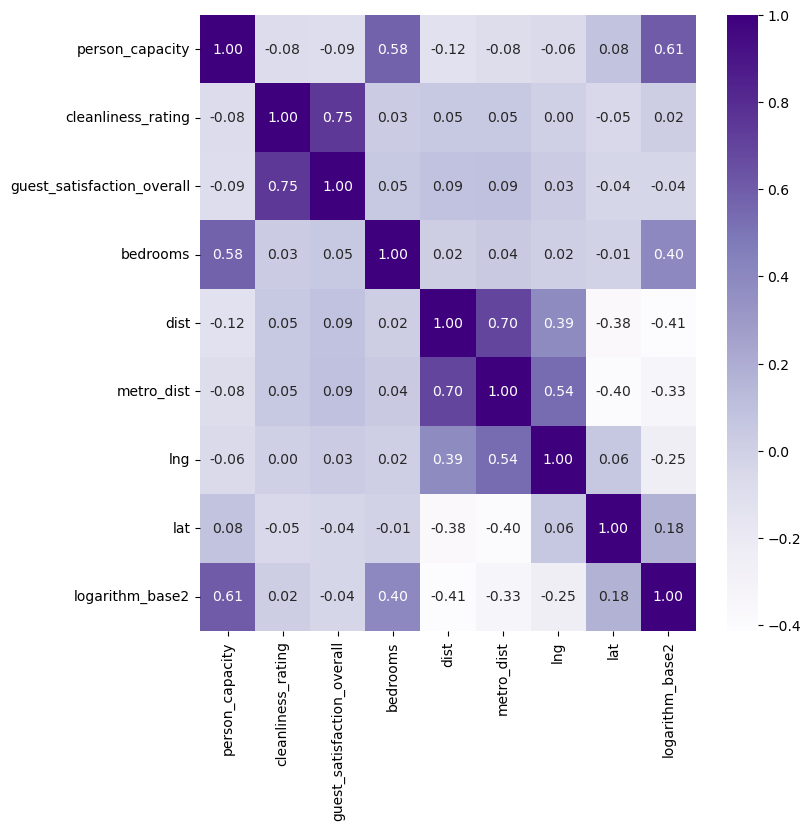

In [10]:
plt.figure(figsize=(8, 8))
sns.heatmap(angka.corr(), cmap='Purples', annot=True, fmt='.2f')

- Berdasarkan heatmap dapat dilihat bahwa variabel independen yang berkorelasi tinggi dengan realSum adalah `person_capacity`dan `bedrooms`.
- Terdapat korelasi tinggi pada variabel independen `guest_satisfaction_overall`dan `cleanliness_rating`

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['person_capacity','guest_satisfaction_overall','cleanliness_rating', 'bedrooms', 'dist', 'metro_dist', 'lng',
       'lat']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,9.810545,person_capacity
1,151.737490,guest_satisfaction_overall
2,147.254091,cleanliness_rating
3,7.510252,bedrooms
4,9.540786,dist
5,3.851813,metro_dist
6,5.503348,lng
7,93.445720,lat


In [12]:
df= df.drop(['guest_satisfaction_overall'], axis= 1)

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['person_capacity', 'cleanliness_rating', 'bedrooms', 'dist', 'metro_dist', 'lng',
       'lat']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,9.749042,person_capacity
1,65.928603,cleanliness_rating
2,7.463791,bedrooms
3,9.539734,dist
4,3.845756,metro_dist
5,5.503278,lng
6,83.035639,lat


In [208]:
df.dtypes

realSum                      float64
person_capacity                int32
cleanliness_rating           float64
bedrooms                       int64
dist                         float64
metro_dist                   float64
lng                          float64
lat                          float64
room_type_Entire home/apt      uint8
room_type_Private room         uint8
room_type_Shared room          uint8
room_shared_0                  uint8
room_shared_1                  uint8
room_private_0                 uint8
room_private_1                 uint8
host_is_superhost_0            uint8
host_is_superhost_1            uint8
multi_0                        uint8
multi_1                        uint8
biz_0                          uint8
biz_1                          uint8
logarithm_base2              float64
dtype: object

### 4. Split Data

In [14]:
X1 = df.drop(['realSum','logarithm_base2'],axis=1)
y1 = df['logarithm_base2']  

In [15]:
X2 = df.drop(['realSum','logarithm_base2'],axis=1)
y2 = df['realSum']

In [16]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=123)

In [17]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=123)

### 5. Modelling

In [18]:
lm = LinearRegression()

In [19]:
lm2 = LinearRegression()

In [23]:
lm.fit(X1_train,y1_train)

LinearRegression()

In [24]:
lm2.fit(X2_train,y2_train)

LinearRegression()

In [25]:
y1_pred = lm.predict(X1_test)

In [26]:
y2_pred = lm2.predict(X2_test)

In [27]:
print('R2 score:',(r2_score(y1_test,y1_pred)))
print('mape score:',mape(y1_test,y1_pred))
print('mae score:',mae(y1_test,y1_pred))
print('rmse score:',mse(y1_test,y1_pred,squared=False))
print('mse score:',mse(y1_test,y1_pred)) 

R2 score: 0.6915012451542328
mape score: 0.04638774456786152
mae score: 0.3801227306440916
rmse score: 0.5064088419981705
mse score: 0.256449915253928


In [28]:
print('R2 score:',(r2_score(y2_test,y2_pred)))
print('mape score:',mape(y2_test,y2_pred))
print('mae score:',mae(y2_test,y2_pred))
print('rmse score:',mse(y2_test,y2_pred,squared=False))
print('mse score:',mse(y2_test,y2_pred))

R2 score: 0.46527092566765504
mape score: 0.3958590341689433
mae score: 126.81185949574247
rmse score: 218.60163535626742
mse score: 47786.67498043451


In [29]:
x1 = sm.add_constant(X1_train)
results = sm.OLS(y1_train,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        logarithm_base2   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     592.6
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:48:19   Log-Likelihood:                -3068.9
No. Observations:                3765   AIC:                             6164.
Df Residuals:                    3752   BIC:                             6245.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         7.6980      4.405      1.747      0.081      -0.939      16.335
person_capacity               0.1500      0.011     13.983      0.000       0.129       0.171
cleanliness_rating            0.0474      0.008      5.701      0.000       0.031       0.064
bedrooms                      0.3067      0.019     15.889      0.000       0.269       0.345
dist                         -0.0868      0.005    -18.536      0.000      -0.096      -0.078
metro_dist                   -0.0345      0.011     -3.016      0.003      -0.057      -0.012
lng                          -0.4430      0.171     -2.586      0.010      -0.779      -0.107
lat                          -0.4453      0.333     -1.336      0.182      -1.099       0.208
room_type_Entire home/apt     1.9605      0.882      2.222      0.026       0.231       3.690
room_type_Private room        2.9205      1.762      1.658      0.097      -0.534       6.375
room_type_Shared room         2.8169      1.762      1.599      0.110      -0.637       6.271
room_shared_0                 4.8810      2.644      1.846      0.065      -0.303      10.065
room_shared_1                 2.8169      1.762      1.599      0.110      -0.637       6.271
room_private_0                4.7775      2.643      1.807      0.071      -0.405       9.960
room_private_1                2.9205      1.762      1.658      0.097      -0.534       6.375
host_is_superhost_0           3.8241      2.203      1.736      0.083      -0.494       8.142
host_is_superhost_1           3.8739      2.203      1.759      0.079      -0.445       8.192
multi_0                       3.8240      2.203      1.736      0.083      -0.494       8.142
multi_1                       3.8740      2.203      1.759      0.079      -0.445       8.193
biz_0                         3.8040      2.203      1.727      0.084      -0.515       8.123
biz_1                         3.8939      2.202      1.768      0.077      -0.424       8.211
==============================================================================
Omnibus:                     1791.389   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23596.563
Skew:                           1.924   Prob(JB):                         0.00
Kurtosis:                      14.645   Cond. No.                     1.75e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.43e-38. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- Berdasarkan nilai p-values terdapat beberapa variabel yang bernilai 0 yaitu `person_capacity`, `bedrooms`, `cleanliness_rating`, dan `dist`. Hal ini berarti variabel tersebut paling berpengaruh terhadap realSum.

In [30]:
exp_y1pred= np.exp(y1_pred)

In [31]:
exp_y1test= np.exp(y1_test)

In [43]:
# # Linear Regrresion menggunakan np.loq
# sns.scatterplot(data=X1_test, x=exp_y1pred,y='dist', color='blue')
# sns.scatterplot(data=X1_test, x=exp_y1test,y='dist', color='red')
# plt.show()

In [44]:
# #Linear Regression tanpa np.loq 
# sns.scatterplot(data=X2_test, x=y2_pred,y='dist', color='blue')
# sns.scatterplot(data=X2_test, x=y2_test,y='dist', color='red')
# plt.show()

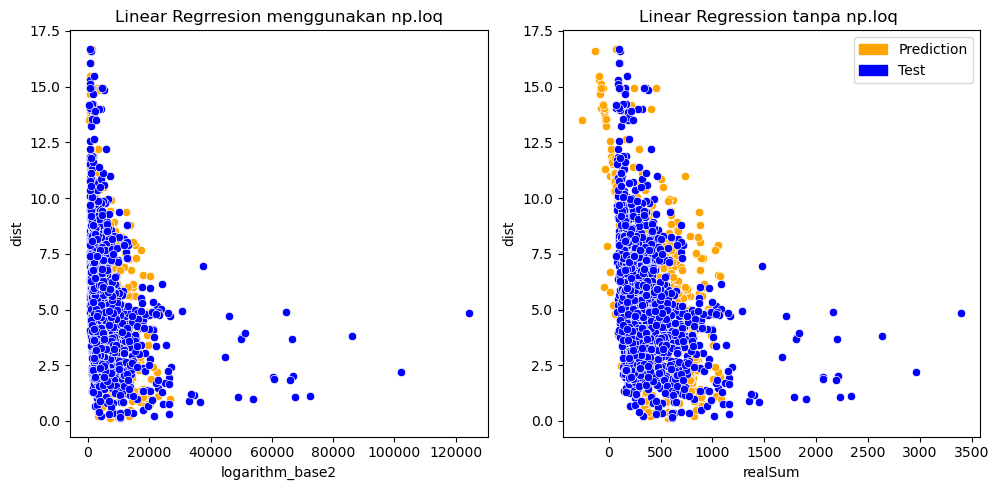

In [42]:
import matplotlib.patches as mpatches
fig = plt.figure(figsize = (10,5))
sub = fig.add_subplot(1,2,1)
plt.title('Linear Regrresion menggunakan np.loq')
# Linear Regrresion menggunakan np.loq
sns.scatterplot(data=X1_test, x=exp_y1pred,y='dist', color='orange')
sns.scatterplot(data=X1_test, x=exp_y1test,y='dist', color='blue')

sub = fig.add_subplot(1,2,2)
plt.title('Linear Regression tanpa np.loq ')
#Linear Regression tanpa np.loq 
sns.scatterplot(data=X2_test, x=y2_pred,y='dist', color='orange')
sns.scatterplot(data=X2_test, x=y2_test,y='dist', color='blue')

# scale_color_manual(name='Regression Model',
#                      breaks=('Test', 'Prediction'),
#                      values=('Test'=='blue', 'Prediction'=='orange'))

orange_patch = mpatches.Patch(color='orange', label='Prediction')
blue_patch = mpatches.Patch(color='blue', label='Test')

plt.legend(handles=[orange_patch, blue_patch])

plt.tight_layout()
plt.show()



- Dari kedua grafik terlihat bahwa ketika menggunakan realSum yang telah di log lebih baik dalam memprediksi dibandingakn dengan tidak menggunakan log dan kedua gambar sejalan dengan nilai R square dimana penggunaan logaritma pada realSum menghasilkan R square yang lebih baik.

### 6. Kesimpulan

- `cleanliness_rating` dan `guest_satisfaction_overall` memiliki korelasi yang kuat positif yang menandakan semakin tinggi rating kebersihan maka semakin tinggi pula tingkat kepuasan tamu.
- `person_capacity` merupakan variabel yang berpengaruh terhadap harga yang berarti semakin banyak jumlah orang harga makin tinggi.
- `bedrooms` merupakan variabel yang berpengaruh terhadap harga yang berarti semakin banyak jumlah kamar harga makin tinggi.
- `cleanliness_rating` merupakan variabel yang berpengaruh terhadap harga yang berarti semakin tinggi rating harga makin tinggi.
- `dist` merupakan variabel yang berpengaruh negatif terhadap harga yang berarti semakin jauh jaraknya harga makin rendah.
- Penerapan Log dalam variabel dependen realSum terbukti efektif dalam meningkatkan nilai R-square model.